## Statistical Analysis of the Efficacy of Various Drug Regimens on Mice


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview

complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = len(complete_data["Mouse ID"].unique())

print(total_mice)

249


In [3]:
# Finding the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_data[complete_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Cleaned DataFrame by dropping the duplicate mouse by its ID.
cleaned_complete_data=complete_data.loc[complete_data ["Mouse ID"]!= "g989"]

cleaned_complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [5]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Used groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Variance = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
StdDev = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
StdErr = cleaned_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [6]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assembled the results into a summary dataframe.
Summary_data = pd.DataFrame({ "Mean Tumor Volume": Mean,
                               "Median Tumor Volume": Median,
                               "Tumor Volume Variance": Variance,
                               "Tumor Volume Std. Dev.":StdDev, 
                               "Tumor Volume Std. Err.":StdErr                              
                             })
Summary_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,61.168083,7.821003,0.581331
Propriva,52.320930,43.852013,43.852013,6.622085,0.544332
Ramicane,40.216745,23.486704,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,59.450562,7.710419,0.573111


In [7]:
# Used the aggregation method, produce the same summary statistics in a single line
new_summary_statistic = cleaned_complete_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

new_summary_statistic

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_table = cleaned_complete_data.loc[cleaned_complete_data["Drug Regimen"] == "Capomulin", :]
Ramicane_table = cleaned_complete_data.loc[cleaned_complete_data["Drug Regimen"] == "Ramicane", :]
Infubinol_table = cleaned_complete_data.loc[cleaned_complete_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_table = cleaned_complete_data.loc[cleaned_complete_data["Drug Regimen"] == "Ceftamin", :]

## Correlation and Regression

In [9]:
# Calculated the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
avg_campomulin_vol = Capomulin_table.groupby("Mouse ID").mean()
avg_campomulin_vol

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [10]:
correlation = st.pearsonr(avg_campomulin_vol["Weight (g)"],avg_campomulin_vol["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


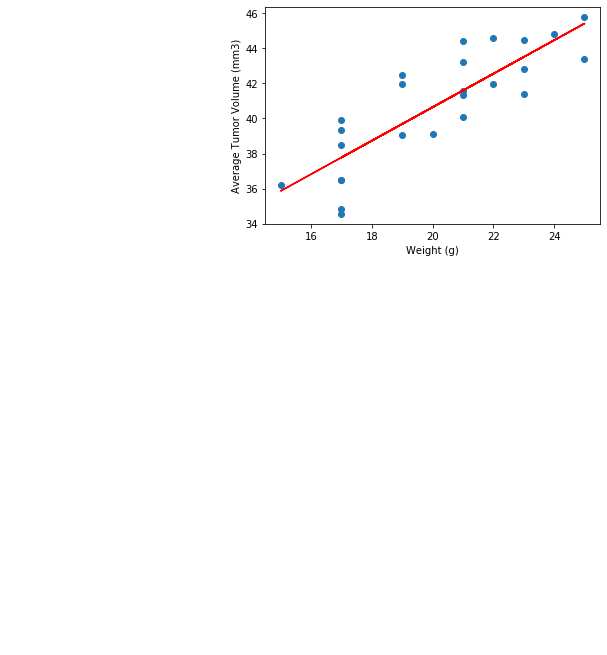

In [11]:
x_values = avg_campomulin_vol["Weight (g)"]
y_values = avg_campomulin_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="yellow")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()